# QCTO - Workplace Module

### Project Title: Vegetable Prices
#### Done By: Nkhubalale Emmanuel Nkadimeng

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [40]:
# Import necessary libraries
import pandas as pd       # For data manipulation
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns     # For advanced visualizations
from datetime import datetime  # For date handling



---
<a id="two"></a>
## **Data Collection and Description**
[Back to Table of Contents](#cont)

* **Purpose:** The purpose of this section is to describe how the Vegetable Prices dataset was collected and provide an overview of its characteristics, including its sources, collection methods, and data types.
* **Details:** The Vegetable Prices dataset is sourced from Kaggle, a popular platform for data science and machine learning enthusiasts. Kaggle hosts a variety of datasets contributed by users, making it an excellent resource for accessing diverse data.

### **Dataset Overview**
- **Size:** The dataset typically contains thousands of entries covering several years.
- **Scope:** It includes price data for various vegetables sold in different markets over a specified time period.
- **Types of Data Available:**
  - **Numerical:** Price and quantity sold.
  - **Categorical:** Vegetable names and market names.
  - **Temporal:** Dates of recorded prices.

This dataset provides valuable insights into market trends and pricing dynamics, aiding in analyses related to seasonal variations and economic factors affecting vegetable pricing.


---


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [41]:
# Load the dataset from a CSV file
vegetable_prices = pd.read_csv('prices.csv')

# Display the first few rows of the dataset to understand its structure
display(vegetable_prices.head())

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** This section outlines the steps involved in handling missing values, removing outliers, correcting errors, and possibly reducing the dataset by filtering based on certain criteria or features.

### Steps for Data Cleaning and Filtering

1. **Handling Missing Values:**
   - Identify missing values in the dataset using `isnull()` or `isna()`.
   - Decide on a strategy to handle them:
     - **Removal**: Drop rows or columns with excessive missing values.
     - **Imputation**: Fill missing values with appropriate substitutes (mean, median, mode, etc.).

  

In [42]:
# Check for missing values
missing_values = vegetable_prices.isnull().sum()
display(missing_values)

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64

In [43]:
# check for duplicates 

duplicates = vegetable_prices.duplicated().sum()
print(f"There are {duplicates} duplicate rows in the dataset")

There are 0 duplicate rows in the dataset


Checking for Negative Prices

As part of our data cleaning process, it is essential to verify that all prices in the dataset are valid. Negative prices are not logical in the context of vegetable pricing and may indicate data entry errors or inconsistencies. 

In this step, we will check each price column for any negative values and count how many such instances exist. This will help us identify any potential issues that need to be addressed before proceeding with further analysis.

In [44]:
# Check for negative prices in the relevant columns
price_columns = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
                 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
                 'Elephant Yam (Suran)']

# Create a DataFrame to store the results
negative_prices = {}

for column in price_columns:
    negative_count = (vegetable_prices[column] < 0).sum()  # Count negative prices
    negative_prices[column] = negative_count

# Display the count of negative prices for each vegetable
print("Negative Prices Count:")
for vegetable, count in negative_prices.items():
    print(f"{vegetable}: {count}")

Negative Prices Count:
Bhindi (Ladies finger): 0
Tomato: 0
Onion: 0
Potato: 0
Brinjal: 0
Garlic: 0
Peas: 0
Methi: 0
Green Chilli: 0
Elephant Yam (Suran): 0


Checking data types of the stored data.

In [45]:
vegetable_prices.dtypes

Price Dates                object
Bhindi (Ladies finger)    float64
Tomato                      int64
Onion                     float64
Potato                      int64
Brinjal                     int64
Garlic                      int64
Peas                        int64
Methi                       int64
Green Chilli              float64
Elephant Yam (Suran)        int64
dtype: object

In [57]:
# Convert the 'Price Dates' column to datetime format
vegetable_prices['Price Dates'] = pd.to_datetime(vegetable_prices['Price Dates'], format='%d-%m-%Y', errors='coerce')

# List of price columns that need to be converted to float
price_columns = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
                 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
                 'Elephant Yam (Suran)']

# Convert each price column to float
for column in price_columns:
    vegetable_prices[column] = vegetable_prices[column].astype(float)

# Verify the data types after conversion
print(vegetable_prices.dtypes)

Price Dates               datetime64[ns]
Bhindi (Ladies finger)           float64
Tomato                           float64
Onion                            float64
Potato                           float64
Brinjal                          float64
Garlic                           float64
Peas                             float64
Methi                            float64
Green Chilli                     float64
Elephant Yam (Suran)             float64
dtype: object


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---
### 1. Summary Statistics
Before diving into visualizations, it's helpful to look at summary statistics to understand the central tendency and spread of the data.



In [59]:

# Display summary statistics for numerical columns
summary_statistics = vegetable_prices.describe()
display(summary_statistics)

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,2023-07-04 21:54:33.867595776,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
min,2023-01-01 00:00:00,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,2023-04-06 12:00:00,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,2023-07-04 00:00:00,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,2023-10-01 12:00:00,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,2024-01-01 00:00:00,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000
std,NaN,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973


<Figure size 1200x800 with 0 Axes>

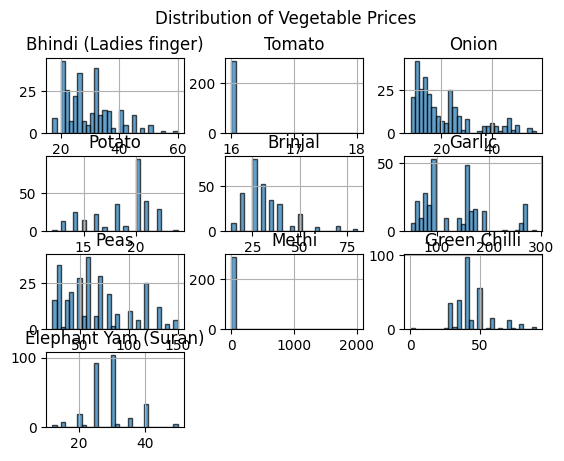

In [62]:
# Histogram of prices for all vegetables
plt.figure(figsize=(12, 8))
vegetable_prices[price_columns].hist(bins=30, edgecolor='black', alpha=0.7)
plt.suptitle('Distribution of Vegetable Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [48]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [49]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [50]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [51]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [52]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
